Analysis of 3 Million Instacart Orders data.

Data source: I came across this data from kaggle competition. https://www.kaggle.com/c/instacart-market-basket-analysis/data

Data is open sourced and available from this link -> https://www.instacart.com/datasets/grocery-shopping-2017

Data dictionary -> https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b

Overview of all tables and columns -> https://www.kaggle.com/c/instacart-market-basket-analysis/discussion/33128#183176

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

os.chdir('E:\\kaggle\\market_basket')

In [2]:
# import all csv files
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
op_prior = pd.read_csv('order_products__prior.csv')
op_train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [3]:
# check number of rows and columsn
print('aisles',aisles.shape)
print('departments',departments.shape)
print('op_prior',op_prior.shape)
print('op_train',op_train.shape)
print('orders',orders.shape)
print('products',products.shape)

aisles (134, 2)
departments (21, 2)
op_prior (32434489, 4)
op_train (1384617, 4)
orders (3421083, 7)
products (49688, 4)


In [4]:
# check for missing values anywhere in the table
print('aisles',aisles.isnull().values.any())
print('departments',departments.isnull().values.any())
print('op_prior',op_prior.isnull().values.any())
print('op_train',op_train.isnull().values.any())
print('orders',orders.isnull().values.any())
print('products',products.isnull().values.any())

aisles False
departments False
op_prior False
op_train False
orders True
products False


In [6]:
# Missig Values exists in Orders Table
print(orders.isnull().sum())

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64


Only days_since_prior_order is having missing values.

In [4]:
# combine aisles, departments and products (left joined to products)
goods = pd.merge(left=pd.merge(left=products, right=departments, how='left'), right=aisles, how='left')
# changing space in product names to '_'
goods.product_name = goods.product_name.str.replace(' ', '_').str.lower() 

Initial Data Exploration

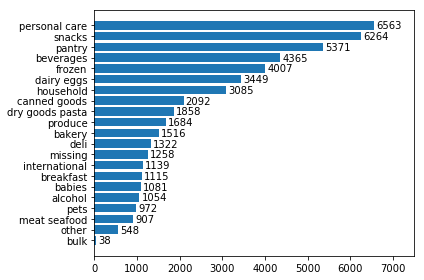

In [10]:
# distribution of number of projects in each department
ind = np.arange(goods['department'].nunique())
y = goods.groupby(['department']).count()['product_id'].sort_values()
fig, ax = plt.subplots()
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(y.index)
for i,v in enumerate(y):
    ax.text(v+50, i-0.3,str(v))
ax.set_xlim([0,7500])    
fig.tight_layout()
plt.show()

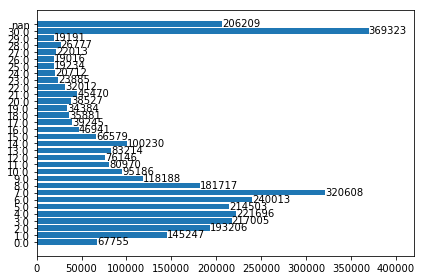

In [10]:
# after how many days the people purchase again
ind = np.arange(orders['days_since_prior_order'].nunique()+1)
y = orders['days_since_prior_order'].value_counts(dropna=False).sort_index()
fig, ax = plt.subplots()
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(y.index)
for i,v in enumerate(y):
    ax.text(v+50, i-0.35,str(v))
ax.set_xlim([0,420000]) 
fig.tight_layout()
plt.show()

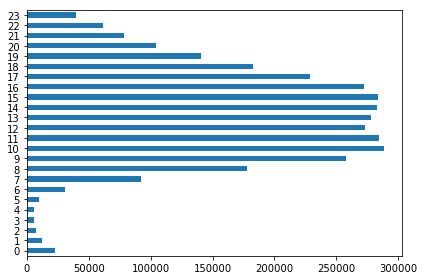

In [11]:
# waht time of day people tend to buy
fig = plt.figure()
orders['order_hour_of_day'].value_counts(dropna=False).sort_index().plot(kind='barh')
fig.tight_layout()
plt.show()

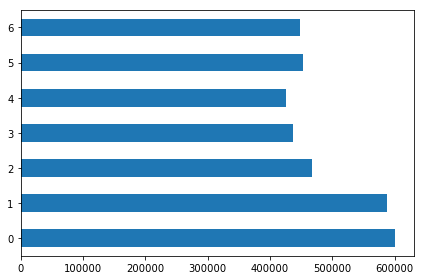

In [12]:
# day in a week 
fig = plt.figure()
orders['order_dow'].value_counts(dropna=False).sort_index().plot(kind='barh')
fig.tight_layout()
plt.show()

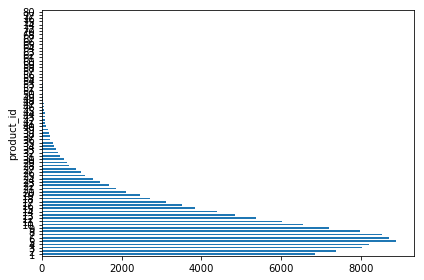

In [13]:
# how many items people buy
# train data set
fig = plt.figure()
op_train.groupby(['order_id']).count()['product_id'].\
groupby(op_train.groupby(['order_id']).count()['product_id']).count().plot(kind='barh')
fig.tight_layout()
plt.show()

In [5]:
# Merge Orders and Order_products_train data
train_orders = pd.merge(left=op_train,
                        right = orders,
                        how = 'left',
                        on = 'order_id')

In [6]:
#Merge goods to this above dataframe
train_order_details = pd.merge(left=train_orders,
                               right=goods,
                               how='left',
                               on='product_id')

In [7]:
# Merge Orders and Order_products_prior data
prior_orders = pd.merge(left=op_prior,
                        right=orders,
                        how = 'left',
                        on='order_id')

In [8]:
#Merge goods to this above dataframe
prior_order_details = pd.merge(left=prior_orders,
                               right=goods,
                               how='left',
                               on='product_id')

In [9]:
# Test Data
test = orders[orders.eval_set == 'test']

We have three data sets at this point. Train, Prior, Test.
Train and Test are pretty intuitive to understand. Let's see the prior data how it is related to train data set.

In [24]:
#prior_order_details.sort_values(['user_id','order_number']).head(100)
prior_order_details[prior_order_details.user_id ==1].sort_values(['order_number','add_to_cart_order'])

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
24076664,2539329,196,1,0,1,prior,1,2,8,NaN,soda,77,7,beverages,soft drinks
24076665,2539329,14084,2,0,1,prior,1,2,8,NaN,organic_unsweetened_vanilla_almond_milk,91,16,dairy eggs,soy lactosefree
24076666,2539329,12427,3,0,1,prior,1,2,8,NaN,original_beef_jerky,23,19,snacks,popcorn jerky
24076667,2539329,26088,4,0,1,prior,1,2,8,NaN,aged_white_cheddar_popcorn,23,19,snacks,popcorn jerky
24076668,2539329,26405,5,0,1,prior,1,2,8,NaN,xl_pick-a-size_paper_towel_rolls,54,17,household,paper goods
22742744,2398795,196,1,1,1,prior,2,3,7,15.0,soda,77,7,beverages,soft drinks
22742745,2398795,10258,2,0,1,prior,2,3,7,15.0,pistachios,117,19,snacks,nuts seeds dried fruit
22742746,2398795,12427,3,1,1,prior,2,3,7,15.0,original_beef_jerky,23,19,snacks,popcorn jerky
22742747,2398795,13176,4,0,1,prior,2,3,7,15.0,bag_of_organic_bananas,24,4,produce,fresh fruits
22742748,2398795,26088,5,1,1,prior,2,3,7,15.0,aged_white_cheddar_popcorn,23,19,snacks,popcorn jerky


In [25]:
#train_order_details.sort_values(['user_id','order_number']).head(100)
train_order_details[train_order_details.user_id ==1].sort_values(['order_number','add_to_cart_order'])

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
484420,1187899,196,1,1,1,train,11,4,8,14.0,soda,77,7,beverages,soft drinks
484421,1187899,25133,2,1,1,train,11,4,8,14.0,organic_string_cheese,21,16,dairy eggs,packaged cheese
484422,1187899,38928,3,1,1,train,11,4,8,14.0,0%_greek_strained_yogurt,120,16,dairy eggs,yogurt
484423,1187899,26405,4,1,1,train,11,4,8,14.0,xl_pick-a-size_paper_towel_rolls,54,17,household,paper goods
484424,1187899,39657,5,1,1,train,11,4,8,14.0,milk_chocolate_almonds,45,19,snacks,candy chocolate
484425,1187899,10258,6,1,1,train,11,4,8,14.0,pistachios,117,19,snacks,nuts seeds dried fruit
484426,1187899,13032,7,1,1,train,11,4,8,14.0,cinnamon_toast_crunch,121,14,breakfast,cereal
484427,1187899,26088,8,1,1,train,11,4,8,14.0,aged_white_cheddar_popcorn,23,19,snacks,popcorn jerky
484428,1187899,27845,9,0,1,train,11,4,8,14.0,organic_whole_milk,84,16,dairy eggs,milk
484429,1187899,49235,10,1,1,train,11,4,8,14.0,organic_half_&_half,53,16,dairy eggs,cream


From above two datasets,

I have filtered user_id = 1, for ease of undeerstanding

user 1 have made total 11 purchases (Order_number), out of which 10 are in prior data and 11th is in train data.

'add_to_cart_order' will give us the sequence of products added to cart.

reordered column will tell us if the products is being purchased again or the first time.


We can combile train data and prior data to make one train dataset. We already have test data ready. we will be ready for futher exploration.

In [10]:
prior_order_details,train_order_details = prior_order_details.align(train_order_details,axis=1)

In [11]:
start = time()
train = pd.concat([prior_order_details,train_order_details])
print(time()-start)

6.828493118286133


In [12]:
print(prior_order_details.shape)
print(train_order_details.shape)
print(prior_order_details.shape[0]+train_order_details.shape[0])
print(train.shape)

(32434489, 15)
(1384617, 15)
33819106
(33819106, 15)


In [13]:
train[train.user_id ==1].sort_values(['order_number'])

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,aisle
24076668,2539329,26405,5,0,1,prior,1,2,8,NaN,xl_pick-a-size_paper_towel_rolls,54,17,household,paper goods
24076667,2539329,26088,4,0,1,prior,1,2,8,NaN,aged_white_cheddar_popcorn,23,19,snacks,popcorn jerky
24076666,2539329,12427,3,0,1,prior,1,2,8,NaN,original_beef_jerky,23,19,snacks,popcorn jerky
24076665,2539329,14084,2,0,1,prior,1,2,8,NaN,organic_unsweetened_vanilla_almond_milk,91,16,dairy eggs,soy lactosefree
24076664,2539329,196,1,0,1,prior,1,2,8,NaN,soda,77,7,beverages,soft drinks
22742749,2398795,13032,6,0,1,prior,2,3,7,15.0,cinnamon_toast_crunch,121,14,breakfast,cereal
22742748,2398795,26088,5,1,1,prior,2,3,7,15.0,aged_white_cheddar_popcorn,23,19,snacks,popcorn jerky
22742747,2398795,13176,4,0,1,prior,2,3,7,15.0,bag_of_organic_bananas,24,4,produce,fresh fruits
22742744,2398795,196,1,1,1,prior,2,3,7,15.0,soda,77,7,beverages,soft drinks
22742745,2398795,10258,2,0,1,prior,2,3,7,15.0,pistachios,117,19,snacks,nuts seeds dried fruit


In [15]:
train.to_csv('train.csv')

In [16]:
test.to_csv('test.csv')